<a href="https://colab.research.google.com/github/yenlung/Py-Math-Book/blob/main/%E5%86%92%E9%9A%AA16_%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%B0%B1%E6%98%AF%E6%89%93%E9%80%A0%E4%B8%80%E5%80%8B%E5%87%BD%E6%95%B8%E5%AD%B8%E7%BF%92%E6%A9%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Python 數據分析套件及中文的 `matplotlib`

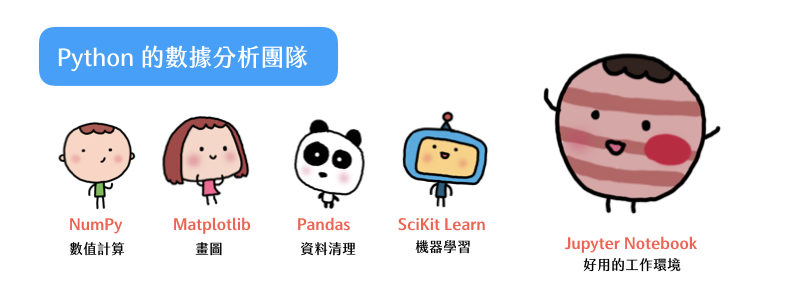

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

需要找一個中文字體, 這裡以翰字鑄造的台北黑體為例, 這裡選了 regular 的版本。

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-12-20 22:59:34--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.139, 74.125.196.100, 74.125.196.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cdfbgb8c2dj0k9ta9522a0olkohtod04/1671577125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7fbdbd4-5e70-4572-8841-a1b4a327fb45 [following]
--2022-12-20 22:59:39--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cdfbgb8c2dj0k9ta9522a0olkohtod04/1671577125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b7fbdbd4-5e70-4572-8841-a1b4a327fb45
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to doc-0k

加入 `matplotlib` 字型的行列!

In [4]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

很快的畫一個函數試試!

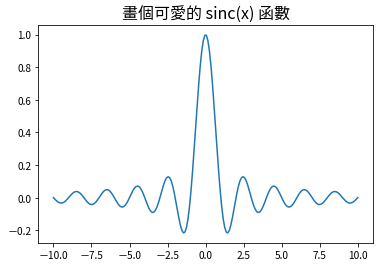

In [9]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.title('畫個可愛的 sinc(x) 函數').set_fontsize(16)
plt.plot(x, y)

可以用用一個叫 `seaborn` 的套件, 美化輸出。

In [10]:
import seaborn as sns 

In [11]:
sns.set()

中文再度設定。

In [12]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

試一下效果。

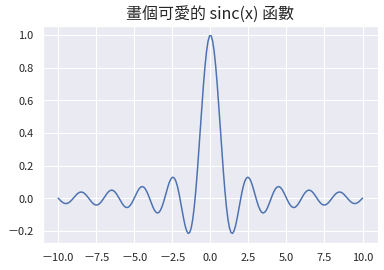

In [13]:
plt.title('畫個可愛的 sinc(x) 函數').set_fontsize(16)
plt.plot(x, y)

## 2. 過度擬合 (overfitting)

我們來看看 Colab (Jupyter Notebook) 超炫的互動! 只要記得, 「有帶參數的函式, 就可以互動」!

我們來看一個超簡單函式。

讀入互動用的指令。

In [14]:
from ipywidgets import interact, interact_manual

In [15]:
X = np.random.randn(6)
Y = np.random.randn(6)

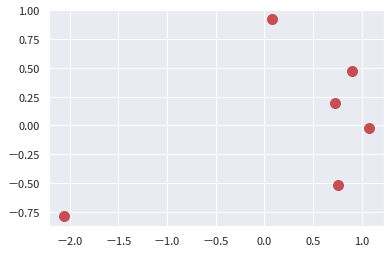

In [16]:
plt.scatter(X, Y, c='r', s=100)

In [17]:
X = np.random.rand(6)
Y = np.random.rand(6)

def myplot(n=1):
    plt.scatter(X, Y, c='r', s=100)
    x = np.linspace(0, 1, 1000)
    y = 0.5*np.sin(n*x) + 0.5
    plt.plot(x, y)

In [18]:
interact(myplot, n=(1., 500));

interactive(children=(FloatSlider(value=1.0, description='n', max=500.0, min=1.0), Output()), _dom_classes=('w…

學得「越像」, 不一定是越好的! 你可能覺得上面的例子太誇張了, 那我們來看看這個例子。

In [19]:
x = np.linspace(0, 1, 200)
y = -(x-1)**2+1

這就是一個漂亮的 2 次多項式函數。

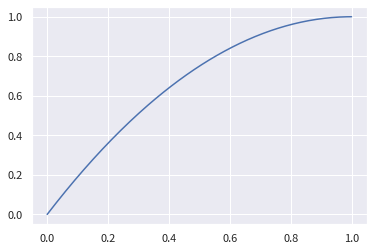

In [20]:
plt.plot(x,y)

真實世界會有些「雜訊」 (noise), 看來比較像是這樣...

In [21]:
X = np.linspace(0, 1, 20)
Y = -(X-1)**2+1 + 0.08*np.random.randn(20)

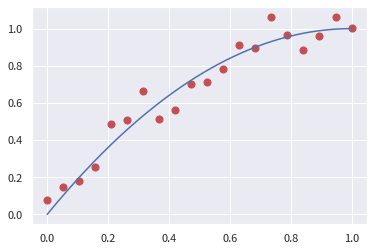

In [22]:
plt.scatter(X,Y, c='r',s=50)
plt.plot(x,y)

用拉格朗日 (Lagrange) 插值法學起來!

In [23]:
z = np.polyfit(X, Y, 19)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
p = np.poly1d(z)

(-0.2, 1.75)

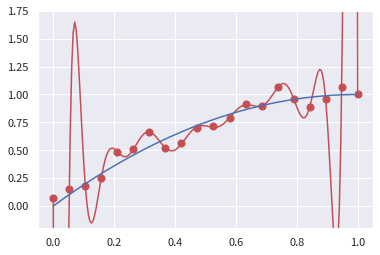

In [25]:
plt.plot(x, p(x),'r')
plt.scatter(X,Y, c='r',s=50)
plt.plot(x,y)
plt.ylim(-0.2, 1.75)

## 3. 迴歸法預測函數

### 3-1 假的數據真的迴歸

做一條直線
我們來一條線, 比如說

$$f(x)=1.2x+0.8$$

準備好個 300 個點, 加入 noise 項, 看來更真實 大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [26]:
x = np.linspace(0, 1, 300)
y = 1.2*x + 0.8 + 0.1*np.random.randn(300)

畫出圖形來。

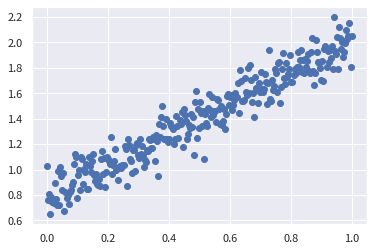

In [27]:
plt.scatter(x,y)

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.model_selection

裡的

    train_test_split

來亂數選一定百分比的資料來用。



In [28]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [30]:
print(f"訓練資料有 {len(x_train)} 筆,")
print(f"測試資料有 {len(x_test)} 筆。")

訓練資料有 240 筆,
測試資料有 60 筆。


####【重點】注意輸入格式

只有一個 feature 時, 我們要小心的是, 很多機器學習、深度學習的套件, 都不希望我們用

x=[$x_1$,$x_2$,…,$x_n$]

這樣子去做, 而是希望變成

x=[[$x_1$],[$x_2$],…,[$x_n$]]

這種形式!

In [31]:
xx = np.array([3, 9, 8, 1, 2])
yy = np.array([1, 3, 9, 2, 4])

目前 `xx` 是個 5 維向量。

In [32]:
xx.shape

(5,)

用 `reshape` 改成 $5 \times 1$ 的矩陣。

In [33]:
xx.reshape(5,1)

array([[3],
       [9],
       [8],
       [1],
       [2]])

注意用 `reshape` 並沒有真正的改變, 確定了我們真的改過來。

In [34]:
xx = xx.reshape(len(xx),1)

#### 正式轉我們的訓練資料

In [35]:
x_train = x_train.reshape(len(x_train),1)
x_test = x_test.reshape(len(x_test), 1)

接著進入 AI 建模三部曲。

#### step 1. 開一台「線性迴歸機」

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regr = LinearRegression()

#### step 2. fit 學習、訓練

In [38]:
regr.fit(x_train, y_train)

LinearRegression()

#### step 3. predict 預測

In [39]:
y_pred = regr.predict(x_test)

畫出圖來會發現學得相當好 (這是廢話)。

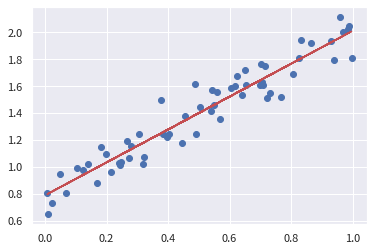

In [40]:
plt.plot(x_test.ravel(), y_pred, 'r')
plt.scatter(x_test.ravel(), y_test)

#### 計算分數

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mse_t = mean_squared_error(y_train, regr.predict(x_train))
r2_t = r2_score(y_train, regr.predict(x_train))

In [43]:
print('訓練資料')
print('MSE =', mse_t)
print("R2 =", r2_t)

訓練資料
MSE = 0.010289128270326582
R2 = 0.9245200598129011


In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("測試資料")
print(f"MSE = {mse:.4f}")
print(f"R2 = {r2:.4f}")

測試資料
MSE = 0.0108
R2 = 0.9202


### 3-2 人工智慧都是要學個函數

1. 問一個實務上關切的問題
2. 想一個可以幫我們回答問題的函數
3. 打造一個「函數學習機」把函數學起來

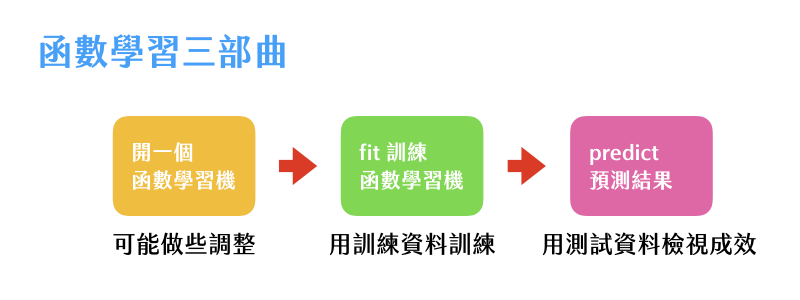

### 3-3 用線性迴歸預測加州房價

現在我們用線性迴歸來預測加州的房價。

In [46]:
from sklearn.datasets import fetch_california_housing

In [47]:
housing = fetch_california_housing()

可以看看說明, 一共有 8 個特徵 (features), 20,640 筆數據。

In [48]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

單獨把特徵的名稱找出來。

In [49]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

特徵的數據是在 `.data` 中, 現在來建一個 Data Frame。

In [50]:
cal = pd.DataFrame(housing.data, 
                   columns=housing.feature_names)

In [51]:
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


把要預測的房價也放進來。

In [52]:
cal['MEDV'] = housing.target

In [53]:
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


可以用 `seaborn` 畫個美美的房價分佈圖。

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


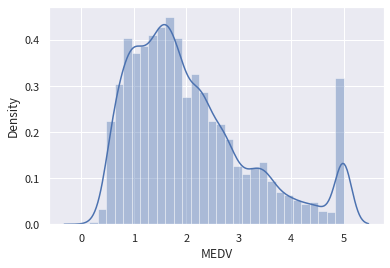

In [54]:
sns.distplot(cal.MEDV, bins=30)

再來可以做一個相關係數矩陣 (Correlation Matrix), 並且畫出 "heat map"。

In [55]:
correlation_matrix = cal.corr().round(2)

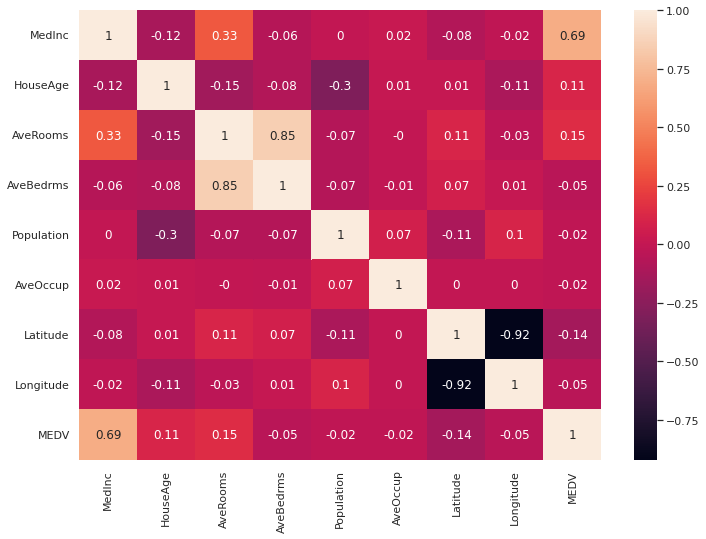

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(correlation_matrix, annot=True)

接下來我們把輸入輸出分好。

In [57]:
X = cal.loc[:,"MedInc":"Longitude"].values
Y = cal.MEDV

切一下訓練及測試資料。

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)

三部曲打造函數學習機!

In [60]:
from sklearn.linear_model import LinearRegression

#### 第一部曲: 開一台函數學習機

In [61]:
model = LinearRegression()

#### 第二部曲: 訓練

In [62]:
model.fit(x_train, y_train)

LinearRegression()

#### 第三部曲: 預測

In [63]:
y_predict = model.predict(x_test)

現在來計算我們預測的成績。

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("MSE =", mse)
print("R2 =", r2)

MSE = 0.5184271726802216
R2 = 0.5955986387884302


用很有創意的方法, 把圖給畫出來。

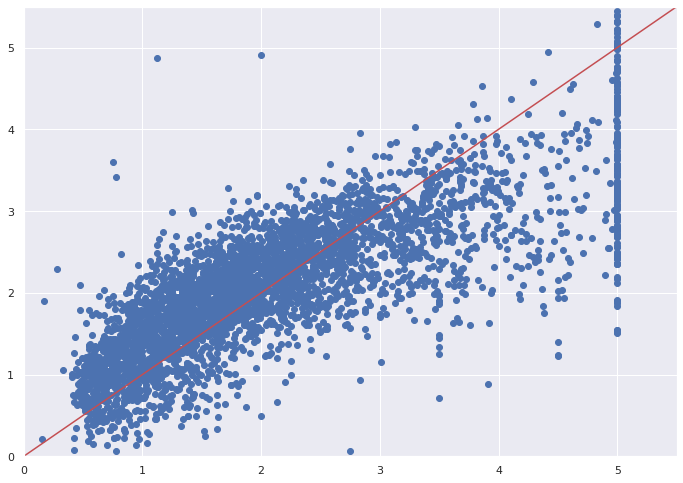

In [66]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 5.5)
plt.ylim(0, 5.5)
plt.plot([0,5.5],[0,5.5],'r')


## 4. SVM 支援向量機

### 4-1 簡單的分類

假設我們有四個點, 有兩個類別。

In [67]:
p = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
c = np.array([1, 2, 1, 2])

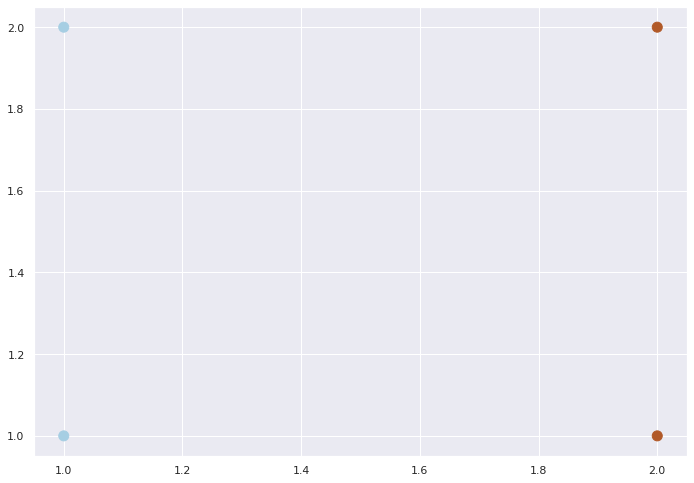

In [68]:
plt.scatter(p[:,0], p[:,1], c=c, s=100, cmap="Paired")

In [69]:
from sklearn.svm import SVC

#### step 1: 打開一台 SVM 函數學習機

In [70]:
clf = SVC()

#### step 2: 訓練

In [71]:
clf.fit(p, c)

SVC()

#### step 3: 預測

In [72]:
y_pred = clf.predict(p)

In [73]:
y_pred

array([1, 2, 1, 2])

畫圖看看。

In [74]:
x = y = np.arange(0.5, 2.5, 0.02)

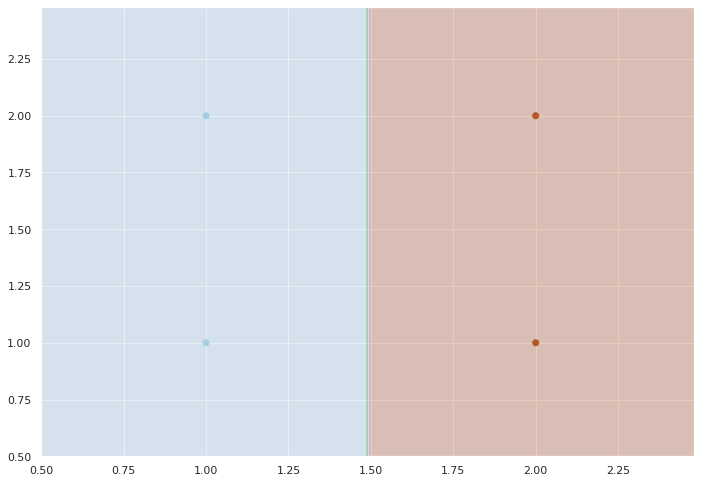

In [75]:
X, Y = np.meshgrid(x, y)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)
plt.contourf(X, Y, Z, alpha=0.3, cmap='Paired')
plt.scatter(p[:,0], p[:,1], c=c, cmap='Paired')

### 4-2 標準的分類問題: 這是哪種鳶尾花

我們現在來看看, 可不可以讓電腦辨識, 這是哪個亞種的鳶尾花?

In [76]:
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()

準備輸入及輸出數據, 注意 4 個特徵我們只用了兩個。

In [78]:
x = iris.data
y = iris.target

In [79]:
X = x[:, :2]
Y = y

切分訓練及測試資料。

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

看一下整筆數據的分佈。

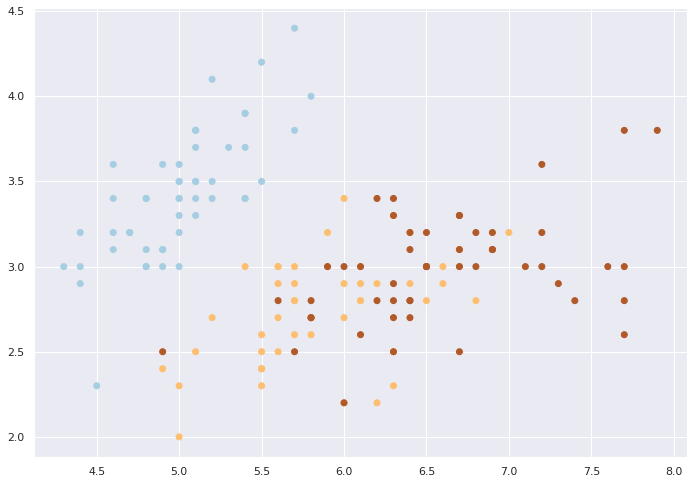

In [81]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

再一次, 三部曲打造函數學習機。

#### 第一部曲：打開一台函數學習機

In [82]:
from sklearn.svm import SVC

In [83]:
clf = SVC()

#### 第二部曲：訓練

In [84]:
clf.fit(x_train, y_train)

SVC()

#### 第三部曲：預測

In [85]:
y_predict= clf.predict(x_test)

看看我們模型預測和真實狀況差多少?

In [86]:
y_predict - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  0, -1,  1,  0,  1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

我們畫圖來看看整體表現如何?

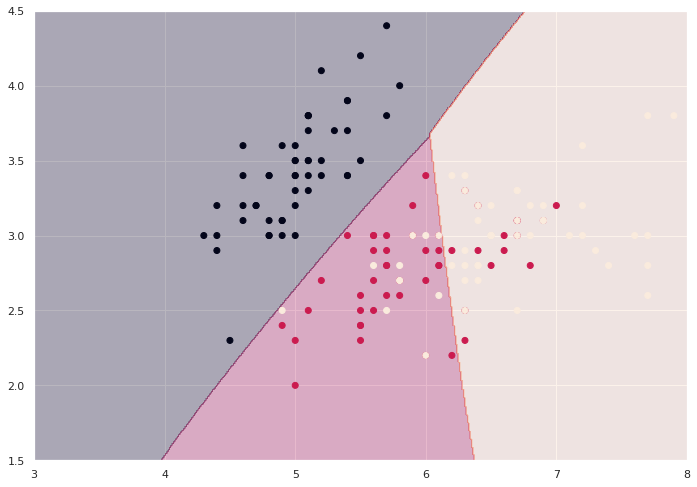

In [87]:
x0 = np.linspace(3, 8, 500)
y0 = np.linspace(1.5, 4.5, 500)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)

plt.scatter(X[:,0], X[:,1], c=Y)

### 4-3 PCA 可以救鳶尾花嗎？

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

In [90]:
pca.fit(x)

PCA(n_components=2)

In [91]:
X = pca.transform(x)

我們來看原來的樣子, 是一個 4 維的向量。

In [92]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

經 PCA 之後, 濃縮成 2 維向量。

In [93]:
X[87]

array([ 0.81509524, -0.37203706])

看看 PCA 後, 來看看整個分布的狀況。

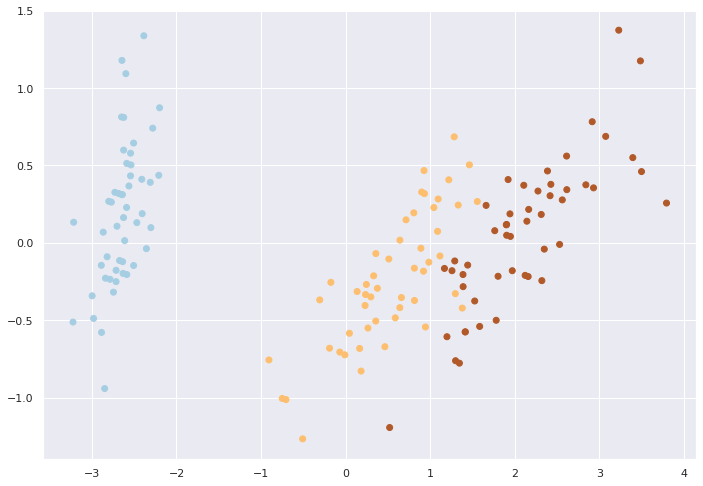

In [94]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

看來好像真的會比較容易切開, 我們來試試是否真的這樣。先來分訓練和測試資料。

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

再來進入標準程序。

### step 1: 打造函數學習機

In [96]:
clf = SVC()

### step 2: 訓練

In [97]:
clf.fit(x_train, y_train)

SVC()

### step 3: 預測

這次我們直接畫出來。

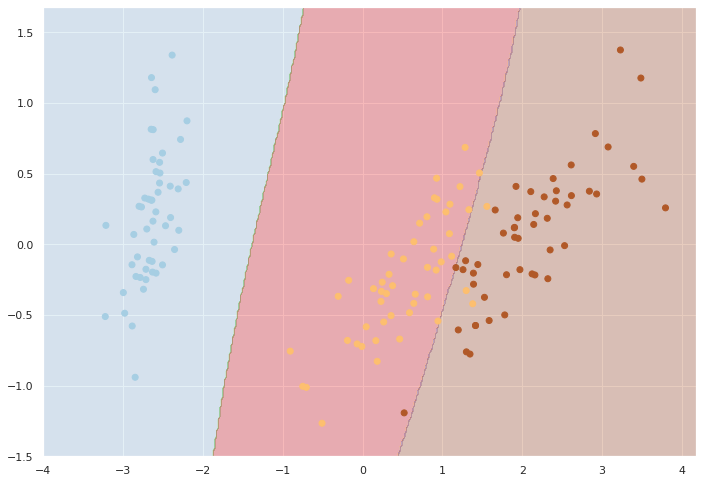

In [98]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

## 5. K-Means 會自動分類！

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!

### 隨便生個 200 點

In [99]:
x = np.random.rand(200,2)

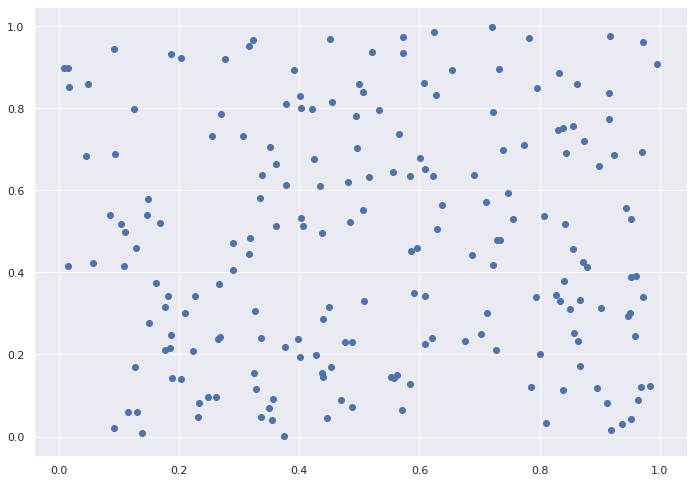

In [100]:
plt.scatter(x[:,0], x[:,1], cmap='Paired')

再次進入標準程序。

#### step 1. 製做一個 K-Means 分類器

和前面 SVM 很像。

In [101]:
from sklearn.cluster import KMeans

記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

In [102]:
clf = KMeans(n_clusters=3)

#### step 2. fit 學習、訓練

注意這時沒有「正確答案」。

In [103]:
clf.fit(x)

KMeans(n_clusters=3)

### step 3. predict

分類好的其實已經放在神秘的 `label_` 了。

In [104]:
clf.labels_

array([1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 2], dtype=int32)

當然我們還是有 `predict`, 所以也可以用 `predict` 預測, 但這電腦自己分的, 答案自然 100% 相同!

In [105]:
clf.predict(x)

array([1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 2], dtype=int32)

我們可以檢查一下, 確認答案是不是真的一樣!

In [106]:
np.array_equal(clf.labels_, clf.predict(x))

True

畫圖來看看分得怎麼樣。

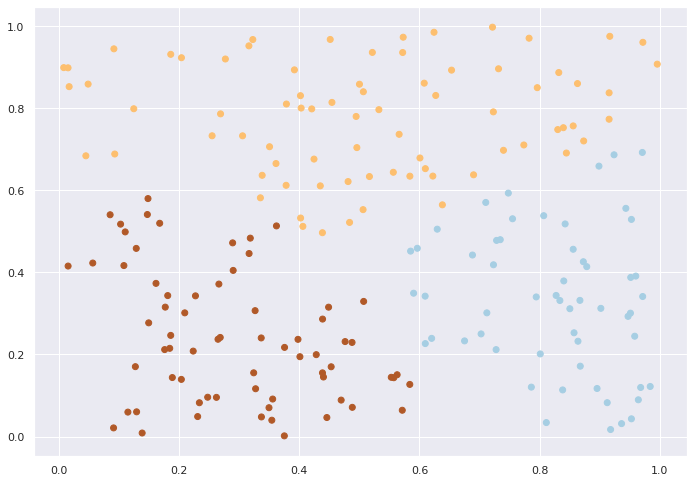

In [107]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

來看看我們最愛的呈現方式...

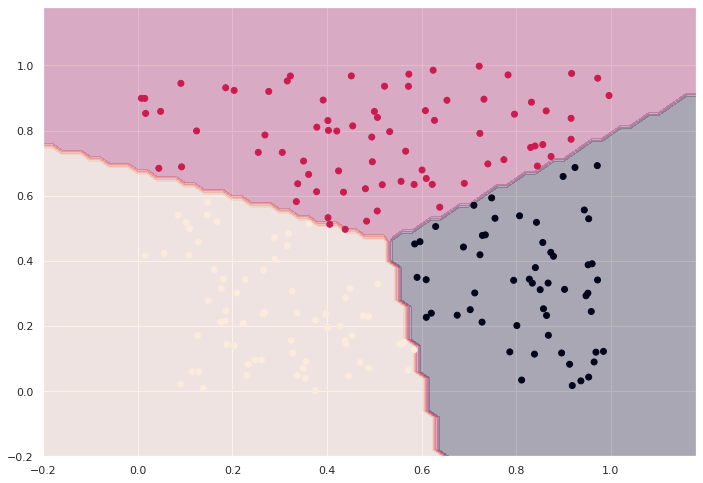

In [108]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

## 6. Mean Shift 也會自動分類！

有時我們甚至不想告訴電腦, 你自動分類應該分成幾類。這時 Mean Shift 可以幫我們。

In [109]:
from sklearn.cluster import MeanShift

再來又是我們三部曲標準程序!

#### step 1: 打開 `MeanShift` 函數學習機

In [110]:
clf = MeanShift(bandwidth=0.2)

這裡的 `bandwidth` 是控制分類要寬鬆一點, 還是嚴一點。

#### step 2: fit 學習、訓練

In [111]:
clf.fit(x)

MeanShift(bandwidth=0.2)

#### step 3: predict

這次我們直接畫圖!

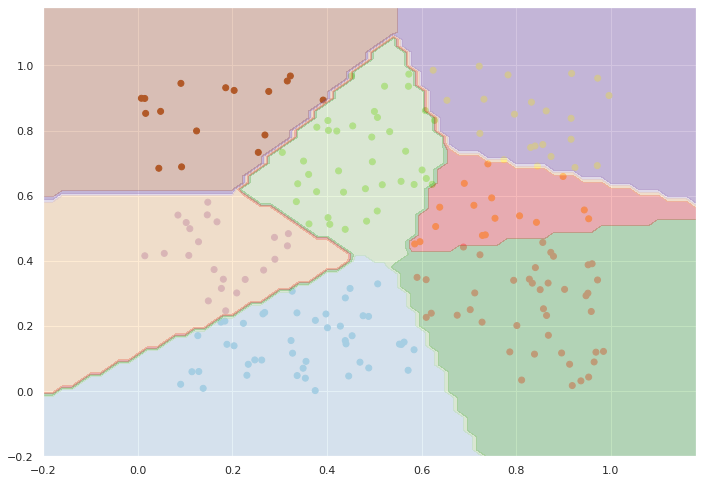

In [112]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')
plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")

觀察 `bandwidth` 對分類的影響。

In [113]:
def my_mean_shift(b=0.2):
    clf = MeanShift(bandwidth=b)
    clf.fit(x)

    x0 = y0 = np.arange(-0.2, 1.2, 0.02)
    xm, ym = np.meshgrid(x0, y0)

    P = np.c_[xm.ravel(), ym.ravel()]
    z = clf.predict(P)
    Z = z.reshape(xm.shape)
    
    plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")
    plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")

測試一下。

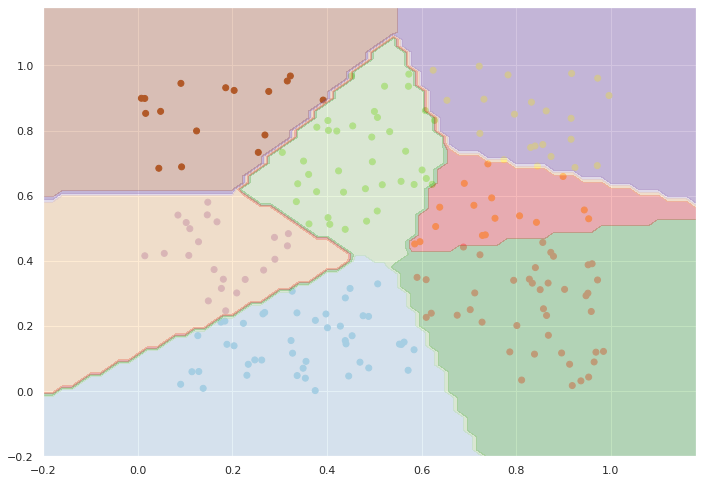

In [114]:
my_mean_shift(0.2)

互動觀察 `bandwidth` 改變有什麼差別。

In [115]:
interact(my_mean_shift, b=(0.1, 0.3, 0.02));

interactive(children=(FloatSlider(value=0.2, description='b', max=0.3, min=0.1, step=0.02), Output()), _dom_cl…

## 7. 怎麼選最好參數、model？

### 7-1 製造像真的一様的數據

In [116]:
from sklearn.datasets import make_blobs

In [117]:
x, y = make_blobs(n_samples=500, centers=3,
                 n_features=2,
                 random_state=0)

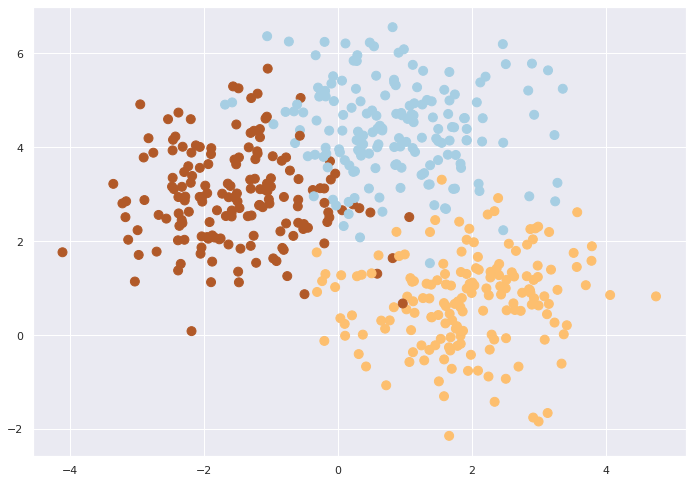

In [118]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=80)

### 7-2 Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

#### 試用 SVC

In [120]:
clf_svc = SVC()

In [121]:
scores = cross_val_score(clf_svc, x, y, cv=5)

看一下五次的成績。

In [122]:
scores

array([0.94, 0.95, 0.98, 0.88, 0.92])

很快的算一下平均。

In [123]:
scores.mean()

0.9339999999999999

#### 試用 Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
clf_dt = DecisionTreeClassifier()

In [126]:
scores = cross_val_score(clf_dt, x, y, cv=5)

In [127]:
scores

array([0.92, 0.9 , 0.95, 0.91, 0.87])

In [128]:
scores.mean()

0.9099999999999999

#### 試用 Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
clf_rf = RandomForestClassifier(n_estimators=100)

In [131]:
scores = cross_val_score(clf_rf, x, y, cv=5)

In [132]:
scores

array([0.92, 0.93, 0.97, 0.89, 0.89])

In [133]:
scores.mean()

0.9200000000000002